In [1]:
%matplotlib notebook

In [2]:
# Dependencies
from matplotlib import pyplot as plt
from scipy import stats
import numpy as np
import pandas as pd

In [3]:
#Import Data
zillow_price = pd.read_csv("../PythonStuff/pricepersqftold.csv")
zillow_price.head(10)


,City,State,Apr-12,May-12,Jun-12,Jul-12,Aug-12,Sep-12,Oct-12,Nov-12,...,Apr-16,May-16,Jun-16,Jul-16,Aug-16,Sep-16,Oct-16,Nov-16,Dec-16,Jan-17
0,New York,NY,1.402,1.412,1.420,1.424,1.422,1.420,1.426,1.442,...,1.806,1.810,1.816,1.824,1.828,1.836,1.844,1.858,1.866,1.872
1,Los Angeles,CA,1.588,1.590,1.588,1.590,1.588,1.592,1.594,1.598,...,1.990,2.004,2.018,2.026,2.032,2.038,2.042,2.048,2.056,2.064
2,Chicago,IL,1.176,1.178,1.182,1.188,1.184,1.182,1.186,1.198,...,1.354,1.362,1.370,1.374,1.378,1.380,1.380,1.380,1.376,1.374
3,Houston,TX,0.786,0.786,0.788,0.788,0.794,0.798,0.798,0.798,...,0.984,0.984,0.982,0.980,0.976,0.974,0.974,0.976,0.976,0.974
4,Philadelphia,PA,0.862,0.860,0.860,0.860,0.858,0.858,0.858,0.856,...,0.948,0.956,0.962,0.964,0.964,0.966,0.968,0.972,0.974,0.974
5,Phoenix,AZ,0.752,0.752,0.754,0.754,0.756,0.758,0.760,0.764,...,0.862,0.870,0.876,0.880,0.882,0.884,0.886,0.890,0.892,0.894
6,Las Vegas,NV,0.722,0.722,0.722,0.722,0.720,0.720,0.718,0.720,...,0.768,0.770,0.772,0.774,0.772,0.774,0.774,0.778,0.780,0.780
7,San Antonio,TX,0.696,0.700,0.704,0.708,0.710,0.712,0.714,0.716,...,0.820,0.822,0.824,0.822,0.822,0.822,0.824,0.830,0.834,0.836
8,San Diego,CA,1.486,1.486,1.488,1.490,1.492,1.492,1.494,1.496,...,1.772,1.782,1.788,1.792,1.794,1.796,1.802,1.808,1.814,1.816
9,Dallas,TX,0.814,0.816,0.822,0.828,0.832,0.838,0.844,0.850,...,1.026,1.034,1.040,1.046,1.048,1.050,1.054,1.060,1.062,1.064


In [4]:
#Define Cities
city_df = zillow_price[((zillow_price.City == 'Washington')|
             (zillow_price.City == 'San Diego')|
             (zillow_price.City == 'Washington')|
            (zillow_price.City == 'New York')|
            (zillow_price.City == 'Albuquerque')|
            (zillow_price.City == 'Atlanta')|
            (zillow_price.City == 'Nashville')) &
             ((zillow_price.State == 'NY')|
             (zillow_price.State == 'CA')|
             (zillow_price.State == 'DC')|
             (zillow_price.State == 'NM')|
             (zillow_price.State == 'TN')|
             (zillow_price.State == 'GA'))]
city_df = city_df.reset_index(drop = True)

In [5]:
zillow_cities = city_df.drop([6,7,8])
zillow_cities

,City,State,Apr-12,May-12,Jun-12,Jul-12,Aug-12,Sep-12,Oct-12,Nov-12,...,Apr-16,May-16,Jun-16,Jul-16,Aug-16,Sep-16,Oct-16,Nov-16,Dec-16,Jan-17
0,New York,NY,1.402,1.412,1.420,1.424,1.422,1.420,1.426,1.442,...,1.806,1.810,1.816,1.824,1.828,1.836,1.844,1.858,1.866,1.872
1,San Diego,CA,1.486,1.486,1.488,1.490,1.492,1.492,1.494,1.496,...,1.772,1.782,1.788,1.792,1.794,1.796,1.802,1.808,1.814,1.816
2,Washington,DC,2.014,2.014,2.008,1.994,1.978,1.970,1.970,1.980,...,2.200,2.212,2.222,2.224,2.220,2.220,2.226,2.234,2.236,2.238
3,Nashville,TN,0.770,0.774,0.776,0.778,0.778,0.778,0.778,0.782,...,1.004,1.010,1.014,1.018,1.020,1.022,1.024,1.028,1.030,1.034
4,Albuquerque,NM,0.706,0.702,0.700,0.694,0.690,0.688,0.688,0.690,...,0.738,0.738,0.738,0.738,0.738,0.738,0.740,0.740,0.740,0.738
5,Atlanta,GA,0.932,0.930,0.932,0.938,0.940,0.942,0.942,0.942,...,1.176,1.186,1.194,1.204,1.212,1.222,1.230,1.240,1.244,1.246


In [10]:
#Set New Index
columns = zillow_cities.columns.to_list()
new_columns = []
for i in columns:
    new = i[len(i)-2:len(i)]
    new_columns.append(new)
new_columns[0] = 'City'
new_columns[1] = 'State'
zillow_cities.columns = new_columns

column_list = ['12', '13', '14', '15', '16', '17']
for i in column_list:
    try:
        zillow_cities[str('20')+str(i)] =  zillow_cities[i].mean(axis = 1).reset_index(drop = True)
    except:
        pass

new_cities = zillow_cities[['City', 'State', '2013', '2014', '2015', '2016']]

In [11]:
new_cities.set_index(["City"])


,State,2013,2014,2015,2016
City,,,,,
New York,NY,1.514667,1.631000,1.741333,1.823833
San Diego,CA,1.525667,1.581000,1.689667,1.781833
Washington,DC,2.036333,2.037833,2.137833,2.215000
Nashville,TN,0.802667,0.854167,0.939833,1.011333
Albuquerque,NM,0.694167,0.699000,0.724333,0.737667
Atlanta,GA,0.970500,1.012500,1.110333,1.200500


<IPython.core.display.Javascript object>


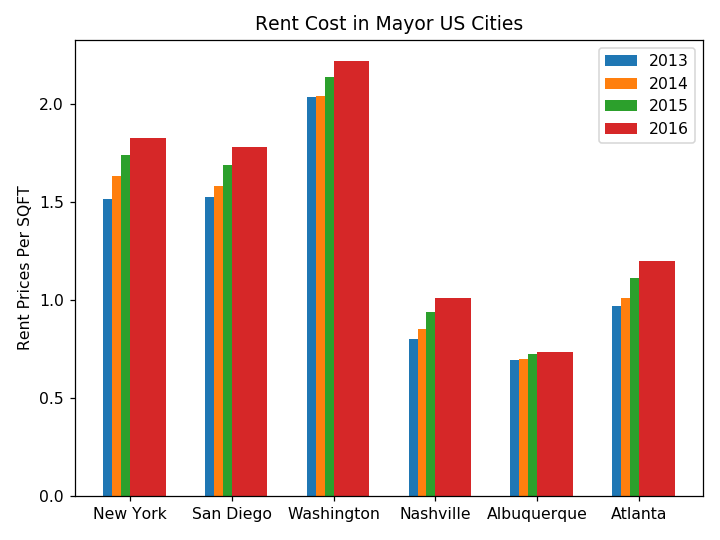

In [13]:
labels = new_cities["City"]

Rent_2013 = new_cities["2013"]
Rent_2014 = new_cities["2014"]
Rent_2015 = new_cities["2015"]
Rent_2016 = new_cities["2016"]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()

rects2 = ax.bar(x - width/4, Rent_2013, width, label='2013')
rects2 = ax.bar(x, Rent_2014, width, label='2014')
rects2 = ax.bar(x + width/4, Rent_2015, width, label='2015')
rects2 = ax.bar(x + width/2, Rent_2016, width, label='2016')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Rent Prices Per SQFT')
ax.set_title('Rent Cost in Mayor US Cities')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


fig.tight_layout()

plt.show()